# Data analysis of Ames, IA Housing dataset- Part I: 

# What factors contribute most in determining home sale prices? How well can the data be used to predict home prices?

# Caveats: the dataset includes housing price data only for several years--2006-2010--which is even less reliable in practice for predicting home prices since several of these years were during the housing bust/financial crisis of 2007-2009. Even so, the data should still be instructive, especially for teasing out which factors played the largest role(s) in determining expected home sale prices.

# Part I will focus on data cleaning and some initial exploratory data analysis. 

# Overview of data cleaning: a.) identifying and deleting variables with higher numbers of null values, and b.) creating indicator/binary variables from some of the qualitative data (e.g., the type of a home's garage).

# Overview of data exploration in Part I: a.) Examine the distribution of the outcome variable (i.e., a home's sale price: ":SalePrice") by implementing boxplots and histograms; b.)  examine summary statistics; c.) implement and examine various data visualizations (e.g., barplots, countplots), such as the range of years when homes were built for the database; and d.) examine various groupby aggregations, the average sale price for each year a home was built, and the total number of homes built each year.

# Data analysis and visualization imports

In [2]:
#For data analysis modules
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

#import vsualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import the dataset. The source for the data is from a Kaggle kernel/topic. The following source also shows descriptions for each variable:
https://www.kaggle.com/deepu123/housing-prices/data.

In [3]:
df_housing = pd.read_csv('Kaggle_Housing_Prices_Ames_Iowa_Sales_2006-2010_dataset.csv')
df_housing.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


# Convert some of the columns to indicator variables, and concatenate these variables to the original dataframe

## Create indicators for SaleCondtion

In [4]:
#SaleCondition to indicators
df_SaleCondition = pd.get_dummies(df_housing['SaleCondition'])
df_SaleCondition.head()

,Abnorml,AdjLand,Alloca,Family,Normal,Partial
0,0,0,0,0,1,0
1,0,0,0,0,1,0
2,0,0,0,0,1,0
3,1,0,0,0,0,0
4,0,0,0,0,1,0


## Create indicators for GarageType

In [5]:
#GarageType
df_garagetype  = pd.get_dummies(df_housing['GarageType'])
df_garagetype.head()

,2Types,Attchd,Basment,BuiltIn,CarPort,Detchd
0,0,1,0,0,0,0
1,0,1,0,0,0,0
2,0,1,0,0,0,0
3,0,0,0,0,0,1
4,0,1,0,0,0,0


## Create indicators for Neighborhood

In [6]:
#Neighborhood to indicators
df_neighb = pd.get_dummies(df_housing['Neighborhood'])
df_neighb.head()

,Blmngtn,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,...,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


## Create indicators for BldgType (i.e., townhouse vs duplex, etc.)

In [7]:
#Type of building: i.e., townhouse vs duplex, etc.
df_bldgtype = pd.get_dummies(df_housing['BldgType'])
df_bldgtype.head()

,1Fam,2fmCon,Duplex,Twnhs,TwnhsE
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0


# Merge the original dataframe with the 4 new sets of indicator variables.

# Use the concat() method with the axis=1 parameter so that the dataframes with the sets of indicator variables will be concatenated to the right of the existing columns, i.e., not concatenated below the existing rows of data.

In [8]:
# use concat() to merge the 3 indicator variable dataframes with the origina dataframe
df_housing = pd.concat([df_housing,df_SaleCondition, df_garagetype, df_bldgtype, df_neighb], axis=1)
df_housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,0,0,0,0,0,0,0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,0,0,0,0,0,0,1
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,0,0,0,0,0,0,0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,0,0,0,0,0,0,0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,1,0,0,0,0,0,0,0,0,0


# Show the data types for each variable, and the total memory usage from storing the dataset

In [9]:
#show data types and memory usage
df_housing.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 123 entries, Id to Veenker
dtypes: float64(3), int64(35), object(43), uint8(42)
memory usage: 4.0 MB


# Number of null values for each column, sorted by descending

In [10]:
#count the total number of null values in each column of the dataframe
null_sum = df_housing.isnull().sum()

#sort the null values of each column by descending, so that the columns with the highest number of null values will be shown on top
null_sum= null_sum.sort_values(ascending=False).head(30) 

null_sum

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
TotRmsAbvGrd       0
LotArea            0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
LotConfig          0
Utilities          0
MSSubClass         0
LandContour        0
MSZoning           0
dtype: int64

## Notice that several variables have a very high number of null values. The sample size is 1460, so several of the variables should be deleted from the dataframe and excluded from further analysis.

# Delete variables with high number of null values

In [11]:
#delete columns

#specify list of the columns that will be deleted
cols = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage']

#drop the columns
df_housing.drop(cols, inplace=True, axis=1)

#check back on the dataset
df_housing.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,0,0,0,0
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,0,0,0,0,1
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,0,0,0,0
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,0,0,0,0,0
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,1,0,0,0,0,0,0,0,0,0


# Summary statistics and exploratory data analysis:

In [12]:
#Display the summary statistics
df_housing.describe()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.00000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,0.028082,0.05274,0.077397,0.017123,0.050685,0.040411,0.058904,0.017123,0.026027,0.007534
std,421.610009,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,0.165264,0.22359,0.267312,0.129775,0.219429,0.196989,0.235526,0.129775,0.159271,0.086502
min,1.000000,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,365.750000,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,730.500000,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1095.250000,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1460.000000,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Show the mean, standard deviation, and median of SalePrice to more easily examine these statistics

In [13]:
df_housing['SalePrice'].mean(), df_housing['SalePrice'].std(), df_housing['SalePrice'].median()

(180921.19589041095, 79442.50288288663, 163000.0)

## The average home sale price in this dataset was $180,921.20. However, the median is somewhat less than the mean, so the distribution of the sale price data are skewed right, and the relatively high standard deviation (79,442.50) shows that the data are also fairly spread out along the mean.

## To understand the sale price data more clearly and examine the distribution of this variable, let's implment a boxplot and histogram.

# Histogram with rugplot of SalePrice

/Users/kevinallen/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Distribution of SalePrice')

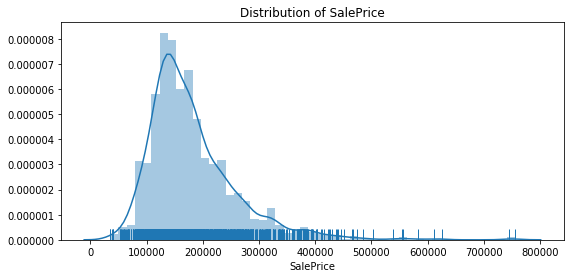

In [14]:
#import pyplot so dimensions of the seaborn-implmented figure can be modified
from matplotlib import pyplot



#input dimensions into the figure
fig1, ax1 = pyplot.subplots(figsize=(9, 4))

#implement histogram w/ rugplot
sns.distplot(df_housing['SalePrice'], rug=True, ax=ax1).set_title('Distribution of SalePrice')

# Boxplot of SalePrice:

Text(0.5, 1.0, 'Boxplot of SalePrice')

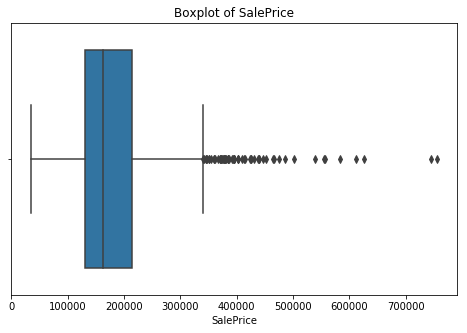

In [15]:
#import pyplot so dimensions of the seaborn-implmented figure can be modified
from matplotlib import pyplot

#input dimensions into the figure
fig2, ax2 = pyplot.subplots(figsize=(8, 5))

#boxplot of Saleprice
sns.boxplot('SalePrice', data=df_housing, ax=ax2).set_title('Boxplot of SalePrice')

## Given that the mean>median, it's no surprise the data are not distributed symmetrically. In fact, there are quite a few outliers in the sample, some of which are a whopping 4 to even 7+ standard deviations above the mean, reflecting a prominent skew to the right.

# Show the distribution of YearBuilt: i.e., show what years the homes were built:

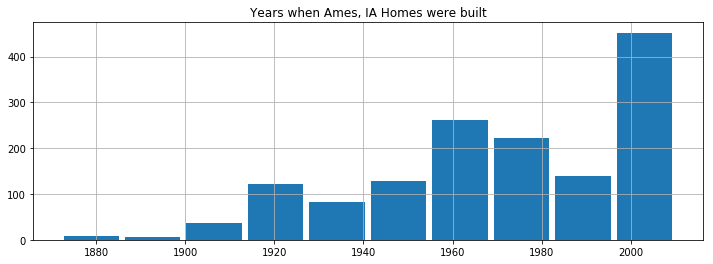

In [170]:
#implement a histogram of the YearBuilt variable
df_housing.YearBuilt.hist(bins=10, rwidth=0.9, figsize=(12,4))

#set title
plt.title('Years when Ames, IA Homes were built')

plt.show()

## The oldest home was built in the 1870s, but many homes were built in the late 1990s to early 2000s in particular. From earlier decades, many homes were also built in the 1960s.

# When were Ames, IA homes sold in this dataset?: Barplot of YrSold and MSold; and Countplot of YrSold:

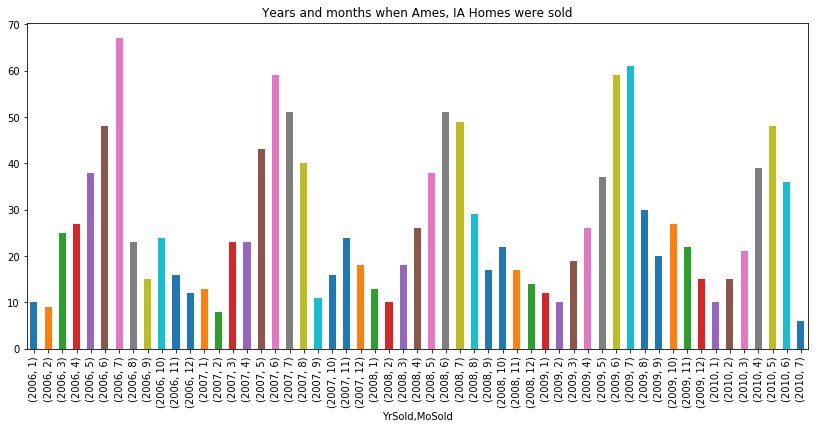

In [71]:
#barplot of year and month sold
df_housing.groupby(['YrSold', 'MoSold']).Id.count().plot(kind='bar',figsize=(14,6))

#set title
plt.title('Years and months when Ames, IA Homes were sold')

plt.show()

# How many homes were sold each year?
# Countplot of the total number of homes sold in each year:

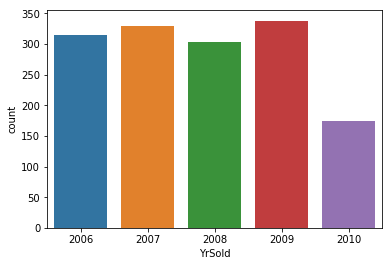

In [179]:
sns.countplot(x='YrSold', data =df_housing)

## The range of the month/year the homes were sold is from January 2006 to July 2010. There does appear to be pretty big variation in the monthly number of homes sold. For example, June or July has the highest number of homes sold for nearly each year which homes were sold, except 2010. 

## Examining the number of homes sold by year, while the number of homes sold declined in 2008 (as expected, given the severity of the 2007-2009 recession), the number of homes sold in 2009 ironically was the highest of the 2006-2009 period. This was in spite of the fact that 2006 precipitated the housing bust. The dataset ends in July 2010, so the number of homes sold in 2010 does not reflect the entire calendar year.

# When were most homes remodeled?
# Histogram of the years the homes were remodeled:

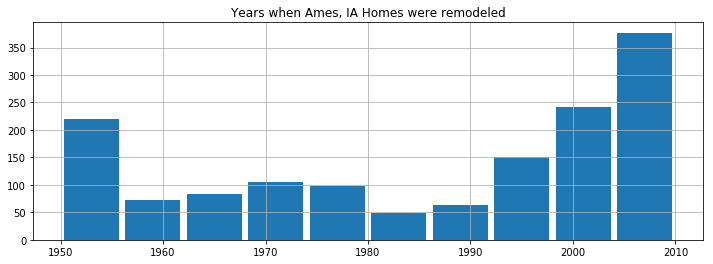

In [171]:
#implement a histogram of YearRemodAdd
df_housing.YearRemodAdd.hist(bins=10, rwidth=0.9, figsize=(12,4))

#set title
plt.title('Years when Ames, IA Homes were remodeled')

plt.show()

## The earliest rennovations (of which there are quite few) date from the 1950s. The majority of rennovations, however, occurred in the early 2000s (the period of 1990s is also fairly high as well). This isn't surprising when we consider that the homes were sold within several years of when many of the remodelings took place since remodeling would help lead to an increase in the value of a home. 

# Show average home SalePrice for each year homes were built, from the dataset

In [13]:
housing_year_stats = df_housing.groupby('YearBuilt')['SalePrice'].mean()
housing_year_stats

YearBuilt
1872    122000.000000
1875     94000.000000
1880    200619.750000
1882    168000.000000
1885    111250.000000
1890    142200.000000
1892    291250.000000
1893    325000.000000
1898    106000.000000
1900    112492.600000
1904    157500.000000
1905    163000.000000
1906    135000.000000
1908    183500.000000
1910    111959.058824
1911    130000.000000
1912    119466.666667
1913     90350.000000
1914    126055.285714
1915    134387.500000
1916    139800.000000
1917    129500.000000
1918    172421.428571
1919    154833.333333
1920    112903.333333
1921    140813.333333
1922    109237.500000
1923    159428.571429
1924    105985.714286
1925    129190.625000
            ...      
1981    249880.000000
1982    132400.000000
1983    181400.000000
1984    164111.111111
1985    191400.000000
1986    212000.000000
1987    198000.000000
1988    204636.363636
1989    279500.000000
1990    220881.666667
1991    186140.000000
1992    218384.615385
1993    218058.823529
1994    247900.000000


## With a few exceptions (such as very old homes built in the late 19th century- maybe some of these homes are Victorian-style homes or have some other highly-regarded, unique architecture or other features), it appears that newer homes command higher sale prices, on average. This makes sense since newer homes will, in general, be in better condition, be made with better materials, and might be more likely to have more features than older homes.

## However, this analysis does not take into consideration whether a given home was re-modeled. Let's see the statistics for the year a home was remodeled.

# Average sale price stats for each year homes were remodeled

In [16]:
housing_remod_stats = df_housing.groupby('YearRemodAdd')['SalePrice'].mean()
housing_remod_stats

YearRemodAdd
1950    117463.056180
1951    129975.000000
1952    110398.600000
1953    147640.000000
1954    121142.857143
1955    124511.111111
1956    124235.000000
1957    132656.444444
1958    128386.666667
1959    136054.555556
1960    145212.500000
1961    131881.250000
1962    145471.428571
1963    139765.384615
1964    159218.181818
1965    143951.736842
1966    149914.666667
1967    131458.333333
1968    153095.882353
1969    157297.071429
1970    139367.307692
1971    120230.555556
1972    127330.000000
1973    139081.818182
1974    159357.142857
1975    174652.400000
1976    159868.500000
1977    158702.000000
1978    158362.500000
1979    150357.200000
            ...      
1981    184425.000000
1982    121271.428571
1983    136880.000000
1984    184928.571429
1985    167611.111111
1986    189400.000000
1987    209790.000000
1988    190533.333333
1989    198318.181818
1990    200042.000000
1991    184714.285714
1992    171611.764706
1993    221994.947368
1994    217231.8181

## These statistics also show a fairly consistent trend of higher average home prices for homes that were remodeled more recently.

# Show average home sale prices for Lot Area (i.e., total size/area of a home's lot):

In [18]:
lot_stats = df_housing.groupby('LotArea')['SalePrice'].mean()
lot_stats

LotArea
1300      124000.000000
1477       80000.000000
1491       75500.000000
1526       86000.000000
1533       94500.000000
1596       91000.000000
1680      101640.000000
1869      106000.000000
1890       97000.000000
1920      122500.000000
1936       84500.000000
1950      151000.000000
1953       83000.000000
1974       83500.000000
2001       75000.000000
2016      106000.000000
2117      174333.333333
2160      160000.000000
2217       88000.000000
2268      173000.000000
2280      157966.666667
2289      148500.000000
2308      151000.000000
2368      125000.000000
2448      154000.000000
2500      155000.000000
2522      132500.000000
2544      147400.000000
2572      155000.000000
2592       85000.000000
              ...      
25286     132250.000000
25339     112000.000000
25419     235000.000000
26142     157900.000000
26178     335000.000000
27650     242000.000000
28698     185000.000000
29959     248000.000000
31770     215000.000000
32463     168000.000000
32668   

## Somewhat surprisingly, while there still appears to be a positive correlation between higher average sale prices and a higher lot area, the home sale prices show more volatility at certain higher lot area sizes relative to the more consistent connection between newer homes and higher sale prices. At the very least, LotArea may very well be positively correlated with average sale prices, but other factors also clearly play a bigger role. 

# Average Home Sale Prices by Neighborhood

In [23]:
df_housing.groupby('Neighborhood')['SalePrice'].mean()

Neighborhood
Blmngtn    194870.882353
Blueste    137500.000000
BrDale     104493.750000
BrkSide    124834.051724
ClearCr    212565.428571
CollgCr    197965.773333
Crawfor    210624.725490
Edwards    128219.700000
Gilbert    192854.506329
IDOTRR     100123.783784
MeadowV     98576.470588
Mitchel    156270.122449
NAmes      145847.080000
NPkVill    142694.444444
NWAmes     189050.068493
NoRidge    335295.317073
NridgHt    316270.623377
OldTown    128225.300885
SWISU      142591.360000
Sawyer     136793.135135
SawyerW    186555.796610
Somerst    225379.837209
StoneBr    310499.000000
Timber     242247.447368
Veenker    238772.727273
Name: SalePrice, dtype: float64

## Home prices clearly differ substantially by neighborhood, on average. The average home sale prices for the neighborhood with the least expensive homes (Meadow Village)--$98,576.47--is barely more than half of the sample average (again, this is a bit above 180,000 dollars).

## Comparing prices from Meadow Village to other neighborhoos, this neighborhood's average home sale price is less than 1/3rd the average sale prices of the 3 neighborhoods with the most expensive homes (each of these have average prices exceeding 300,000 dollars.

# Export the data to a new CSV file, so the changes implemented to it via the data cleaning and wrangling will be saved for the upcoming ipython notebooks. 

In [16]:
#export dataframe to CSV
df_housing.to_csv('Amex_IA_dataset_cleaned.csv')

In [18]:
df_housing = pd.read_csv('Amex_IA_dataset_cleaned.csv')
df_housing.head()

,Unnamed: 0,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker
0,0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,0,0,0,0
1,1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,0,0,0,0,1
2,2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,0,0,0,0,0
3,3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,0,0,0,0,0,0
4,4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,...,1,0,0,0,0,0,0,0,0,0
